In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [9]:
boston=load_boston()
boston_X,boston_y= load_boston(return_X_y=True)

In [11]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
boston_X= pd.DataFrame(boston_X, columns= boston.feature_names)
boston_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
boston_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [14]:
boston_X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [15]:
boston_X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [24]:
for col in boston.feature_names:
    max_degerler=abs(boston_X.corr()[col]).nlargest(n=5)
    for index, value in max_degerler.items():
        if 1>value >=0.75:
            print(index,col,"max corr",value)

NOX INDUS max corr 0.7636514469209139
DIS NOX max corr 0.7692301132258282
INDUS NOX max corr 0.7636514469209139
NOX DIS max corr 0.7692301132258282
TAX RAD max corr 0.9102281885331865
RAD TAX max corr 0.9102281885331865


In [25]:
abs(boston_X.corr()['CRIM']).nlargest(n=5)

CRIM     1.000000
RAD      0.625505
TAX      0.582764
LSTAT    0.455621
NOX      0.420972
Name: CRIM, dtype: float64

In [26]:
boston_X.drop(['NOX','RAD'], axis=1,inplace=True)

In [27]:
boston_X.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,7.147,54.2,6.0622,222.0,18.7,396.90,5.33


In [28]:
train_test_split?

In [30]:
 X_train, X_test, y_train, y_test = train_test_split(boston_X,
                                                    boston_y,
                                                     test_size=0.33,
                                                     random_state=42)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 11), (167, 11), (339,), (167,))

In [43]:
multiplple_regression=LinearRegression()
multiplple_regression.fit(X_train,y_train)

LinearRegression()

In [45]:
multiplple_regression.coef_.round(2)

array([-0.08,  0.03, -0.05,  3.45,  4.16, -0.03, -1.18, -0.  , -0.69,
        0.01, -0.57])

In [46]:
multiplple_regression.intercept_

19.112676625700175

In [48]:
boston_y_predicted=multiplple_regression.predict(X_test)

In [49]:
boston_y_predicted

array([27.84890807, 36.17704878, 17.40316633, 25.2968811 , 18.76062642,
       22.00295224, 17.27926162, 14.89656835, 20.35573203, 21.38010186,
       23.39484419, 17.87154312, -6.13940655, 21.21726215, 18.90162665,
       25.22539637, 18.22824244,  5.02209078, 39.6267099 , 17.50782638,
       27.55897338, 29.44559371, 11.29644701, 25.41225522, 18.00541822,
       13.83645963, 22.78367984, 14.75645747, 21.29318202, 20.33571279,
       21.06233692, 25.40772108, 25.14608523, 19.14911072, 14.38220628,
       20.55711396, 30.86138884, 20.72483283, 23.61106688, 24.77584746,
       14.68999193, 30.26928138, 41.10937866, 17.63643964, 27.17447136,
       16.74012194, 14.1477595 , 26.03219015, 18.4170993 , 31.24726074,
       20.71398511, 32.84525704, 16.08102298, 27.02070789, 39.27967516,
       22.03408108, 19.08741782, 32.45386309, 24.66378053, 12.02193162,
       22.52544363, 30.57777848, 31.51312786, 17.83080875, 22.91726257,
       15.20837999, 19.89950277, 26.09103456, 31.16676135, 11.98

In [50]:
y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4, 12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,
        8.7, 27.5, 20.7, 36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6,
       24.4,  8.8, 19.2, 25.3, 20.4, 23.1, 37.9, 15.6, 45.4, 15.7, 22.6,
       14.5, 18.7, 17.8, 16.1, 20.6, 31.6, 29.1, 15.6, 17.5, 22.5, 19.4,
       19.3,  8.5, 20.6, 17. , 17.1, 14.5, 50. , 14

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test,boston_y_predicted)

0.6919945689994251

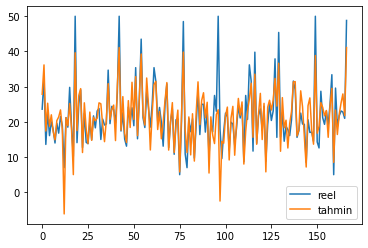

In [56]:
plt.plot(y_test,label='reel')
plt.plot(boston_y_predicted, label='tahmin')
plt.legend()